In [2]:
import scipy.io as sio
import yaml
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from torch import nn

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, ToTensor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.metrics import accuracy_score

import utils as u
import RPNetRFextractor as rp

from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC


from sklearn.model_selection import train_test_split

configuration = yaml.safe_load(open('config.yaml'))
data_path= configuration["data"]
parameters = configuration["parameters"]


In [3]:
X1, y1 = u.load_data("KSC")
X2, y2 = u.load_data("IP")
X3, y3 = u.load_data("PU")

print(X1.shape, y1.shape, X2.shape, y2.shape, X3.shape, y3.shape)

X, y= X1, y1

(512, 614, 176) (512, 614) (145, 145, 220) (145, 145) (610, 340, 103) (610, 340)


In [39]:
def visualize_train_test(train_mask, test_mask, unsup_mask):
    train = np.zeros(train_mask.shape, dtype=np.uint8)
    train[train_mask] = 255

    test = np.zeros(train_mask.shape, dtype=np.uint8)
    test[test_mask] = 255

    unsup = np.zeros(train_mask.shape, dtype=np.uint8)
    # unsup[unsup_mask] = 255
    newfig, ax = plt.subplots(1,1, figsize=(10,10))
    image = np.stack((train, test, unsup), axis =2)

    ax.imshow(image)

# KSC dataset : 

In [4]:
tensor = rp.RPNet_RF(X1, parameters)

# SVM parameters C and gamma were set to 1024 and 0.01,

classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(C=1024, gamma=0.01, kernel='rbf'))])

Conv 1 done, shape : torch.Size([512, 614, 50])
Conv 2 done, shape : torch.Size([512, 614, 50])
Conv 3 done, shape : torch.Size([512, 614, 50])
Conv 4 done, shape : torch.Size([512, 614, 50])
We keep 39 principal components to keep 99.95% of the variance.


In [5]:
# SVM parameters C and gamma were set to 1024 and 0.01,

classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(C=1024, gamma=0.01, kernel='rbf'))])

In [7]:
train_mask, test_mask, unsup_mask = u.balanced_split(y1, 0.2)

X_train, y_train = tensor[train_mask], y1[train_mask]
X_test, y_test = tensor[test_mask], y1[test_mask]
X_unsup, y_unsup = tensor[unsup_mask], y1[unsup_mask]

In [8]:
print(X_train.shape, X_test.shape, X_unsup.shape)

torch.Size([4163, 215]) torch.Size([1048, 215]) torch.Size([309157, 215])


In [9]:
classifier.fit(X_train, y1[train_mask])

Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC(C=1024, gamma=0.01))])

In [10]:
accuracy_score(y_test, classifier.predict(X_test))

0.9980916030534351

In [34]:
full_prediction = classifier.predict(tensor.reshape(-1, tensor.shape[2])).reshape(y1.shape)
relevant_predictions = full_prediction * (train_mask + test_mask)

newfig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(relevant_predictions)

ValueError: cannot reshape array of size 21025 into shape (512,614)

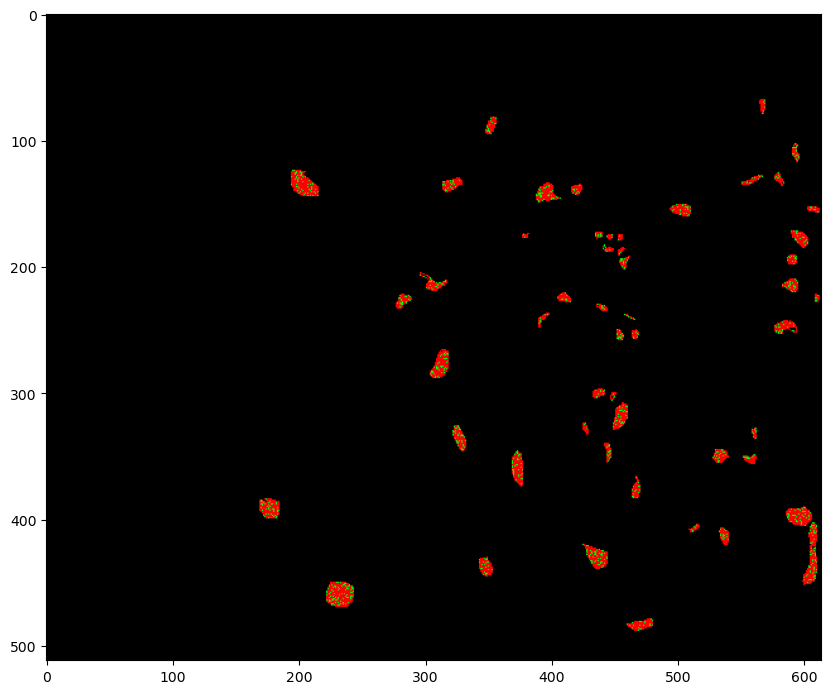

In [96]:
visualize_train_test(train_mask, test_mask, unsup_mask)

# IP dataset

In [28]:
X, y= X2, y2

In [29]:
tensor = rp.RPNet_RF(X, parameters)

# SVM parameters C and gamma were set to 1024 and 0.01,

classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(C=1024, gamma=0.01, kernel='rbf'))])

train_mask, test_mask, unsup_mask = u.balanced_split(y, 0.2)

X_train, y_train = tensor[train_mask], y[train_mask]
X_test, y_test = tensor[test_mask], y[test_mask]
X_unsup, y_unsup = tensor[unsup_mask], y[unsup_mask]

Conv 1 done, shape : torch.Size([145, 145, 50])
Conv 2 done, shape : torch.Size([145, 145, 50])
Conv 3 done, shape : torch.Size([145, 145, 50])
Conv 4 done, shape : torch.Size([145, 145, 50])
We keep 61 principal components to keep 99.95% of the variance.


In [33]:
classifier.fit(X_train, y[train_mask])
accuracy_score(y_test, classifier.predict(X_test))

0.9961070559610705

Text(0.5, 1.0, 'Ground truth')

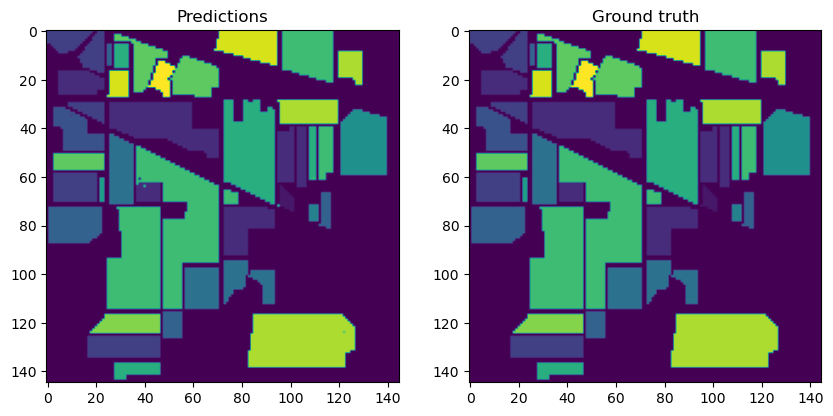

In [41]:
full_prediction = classifier.predict(tensor.reshape(-1, tensor.shape[2])).reshape(y.shape)
relevant_predictions = full_prediction * (train_mask + test_mask)

Text(0.5, 1.0, 'Ground truth')

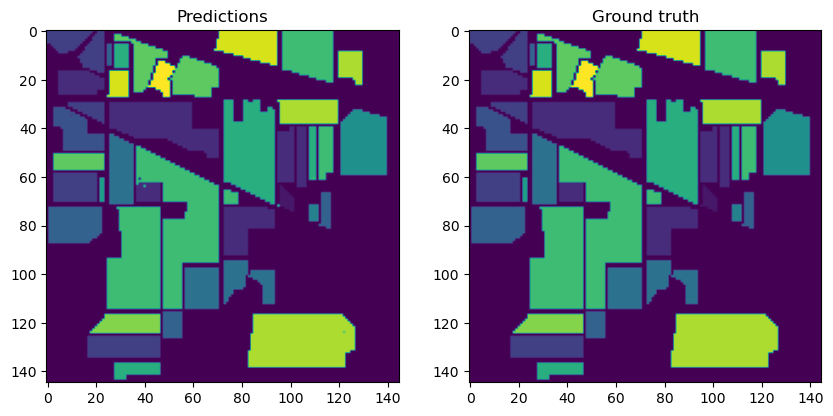

In [42]:

newfig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(relevant_predictions)
ax[0].set_title("Predictions")
ax[1].imshow(y)
ax[1].set_title("Ground truth")

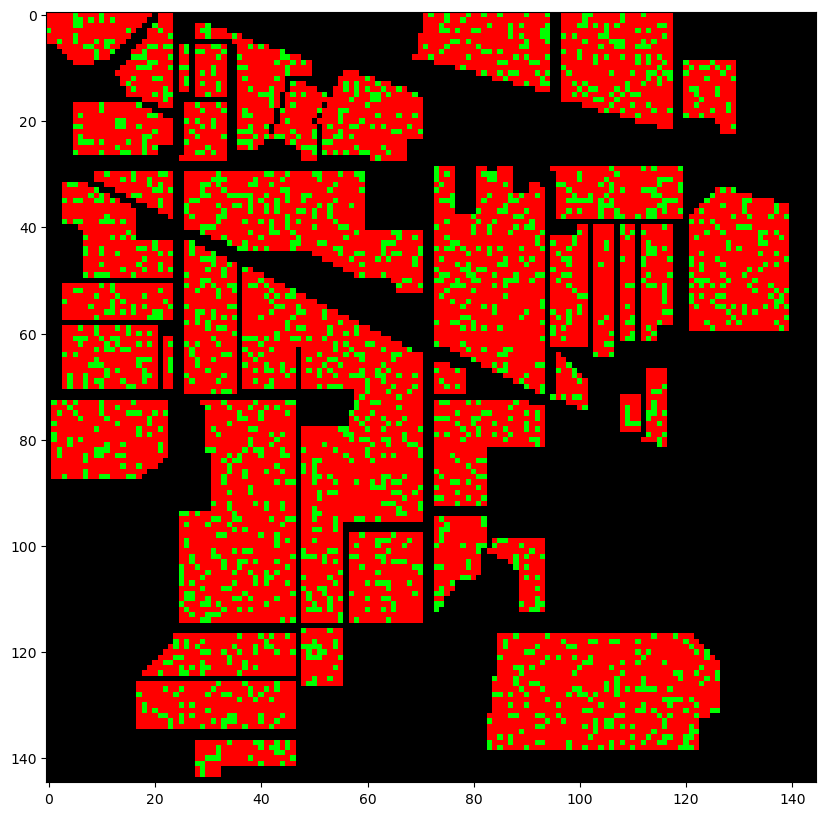

In [43]:
visualize_train_test(train_mask, test_mask, unsup_mask)

# PU dataset

In [44]:
X, y= X3, y3

In [45]:
tensor = rp.RPNet_RF(X, parameters)

# SVM parameters C and gamma were set to 1024 and 0.01,

classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(C=1024, gamma=0.01, kernel='rbf'))])

train_mask, test_mask, unsup_mask = u.balanced_split(y, 0.2)

X_train, y_train = tensor[train_mask], y[train_mask]
X_test, y_test = tensor[test_mask], y[test_mask]
X_unsup, y_unsup = tensor[unsup_mask], y[unsup_mask]

Conv 1 done, shape : torch.Size([610, 340, 50])
Conv 2 done, shape : torch.Size([610, 340, 50])
Conv 3 done, shape : torch.Size([610, 340, 50])
Conv 4 done, shape : torch.Size([610, 340, 50])
We keep 59 principal components to keep 99.95% of the variance.


In [46]:
classifier.fit(X_train, y[train_mask])
accuracy_score(y_test, classifier.predict(X_test))

0.9981304043000702

In [47]:
full_prediction = classifier.predict(tensor.reshape(-1, tensor.shape[2])).reshape(y.shape)
relevant_predictions = full_prediction * (train_mask + test_mask)

Text(0.5, 1.0, 'Ground truth')

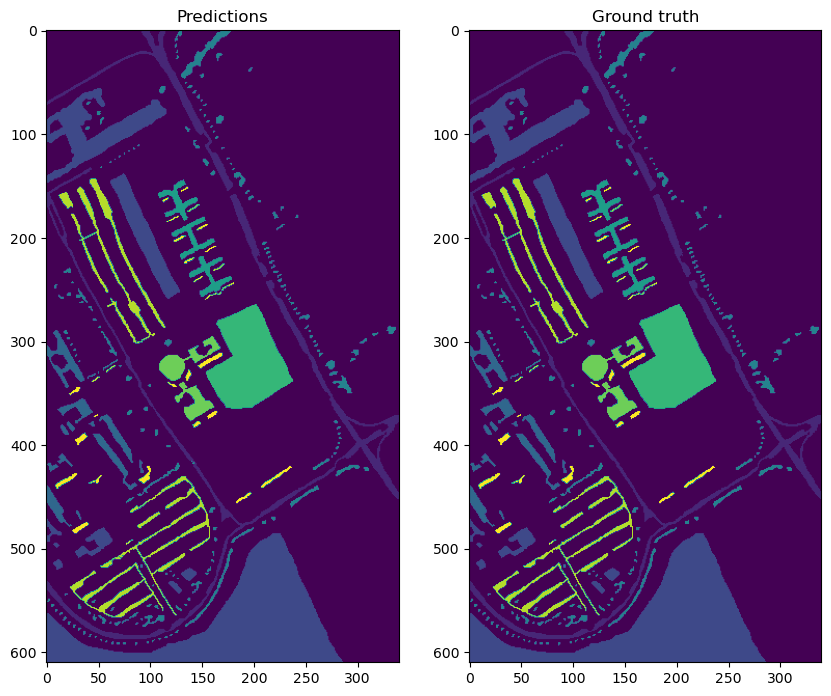

In [48]:

newfig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(relevant_predictions)
ax[0].set_title("Predictions")
ax[1].imshow(y)
ax[1].set_title("Ground truth")

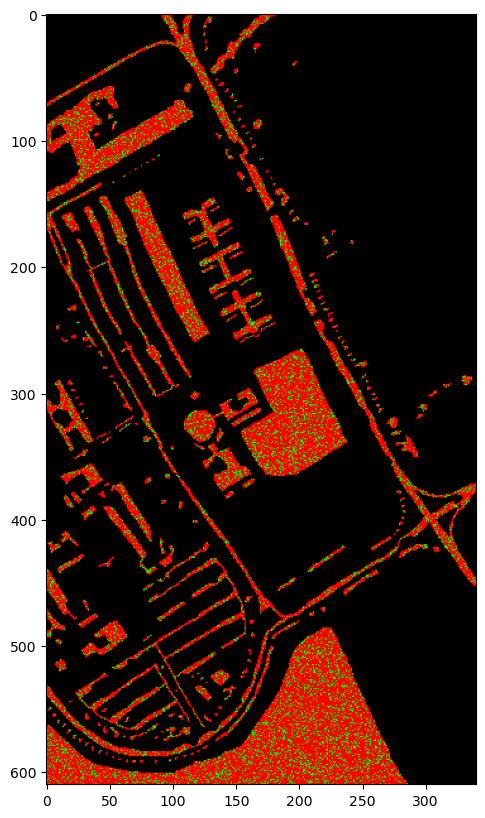

In [49]:
visualize_train_test(train_mask, test_mask, unsup_mask)